# Reconstruction of signals using spectrograms zeros

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
import zerosSpectrogram

We investigate in this notebook the feasibility of signal reconstruction using spectrogram zeros.

Two parameters can be freely chosen: `SNR` (signal-to-noise ratio) and `duration` of the signal.

We start by generating a linear chirp signal corrupted by white Gaussian noise.

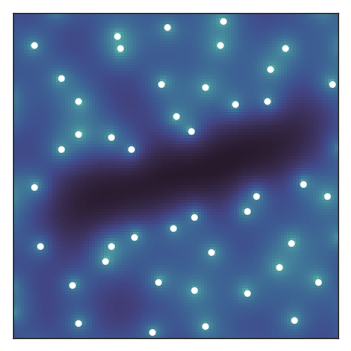

In [4]:
np.random.seed(12) # to reproduce paper results
base = 128 # controls the length of the simulation

# signal parameters
duration = base - 20 
SNR = 10

# simulate
Sww, pos_exp, stft, chirp = zerosSpectrogram.experiments.demoSpectrogramSignal(SNR, duration, viz=True, shrink=False)

We then fix a segmentation radius $r_0$, obtained for instance by inspecting rank envelope test results. 
Then we span the time-frequency plane, and mark bins of the spectrogram such that there are no zeros in the disk of
radius $r_0$ centered at the bin center.

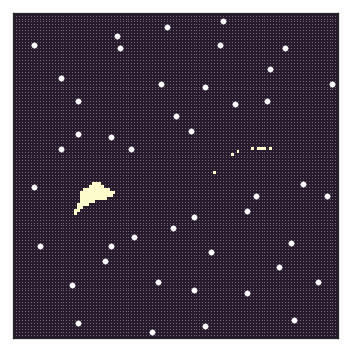

In [5]:
radi_seg = 1 # fix segmentation radius
empty_mask = zerosSpectrogram.utils.findCenterEmptyBalls(Sww, pos_exp, radi_seg)

Then to be conservative we add every point of the time-frequency plane that is within $r_0/2$ of it. Then we find the convex hull associated to this novel area:

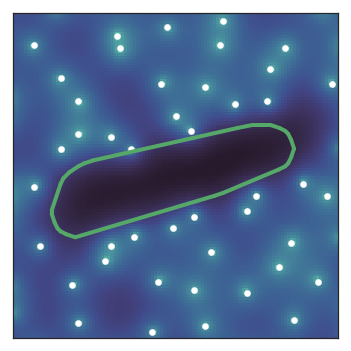

In [7]:
# plot convex Hull
hull = zerosSpectrogram.utils.getConvexHull(Sww, pos_exp, empty_mask)

Then this convex hull is used to compute a mask to invert the original stft:

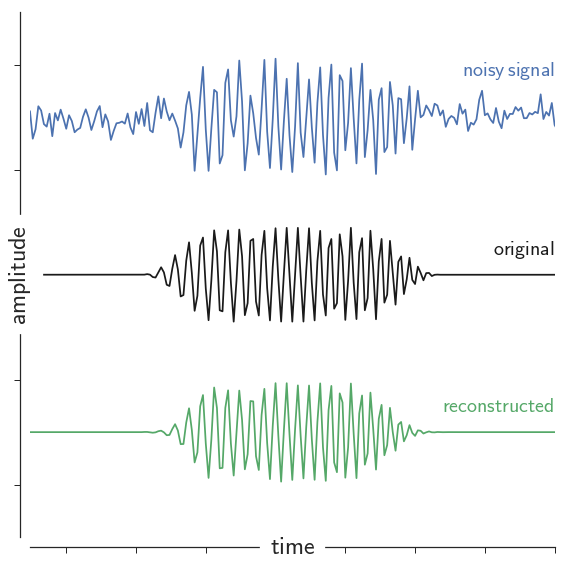

In [8]:
# reconstruction
amp = np.sqrt(2*SNR)
zerosSpectrogram.utils.reconstructionSignal(hull, stft, amp*chirp)